# Appendix 2: Descriptive Statistics

> **This second appendix** of the exam project named "XX", holds the python code used to produce the descriptive statistics presented in the paper. 



## 1. Loading of relevant libraries and scraped data

In [196]:
# Import the relevant libraries used for data structuring and plotting:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 
%matplotlib inline 

# Load scraped data from Vivino:
data = pd.read_csv("merged_data2.csv", index_col=[0])
df = pd.DataFrame(data=data)
df = df.sort_values(by='year',ascending=False)
df.head()

,name,rating,sub_region,year,"price, kr.",light-bold,smooth-tannic,dry-sweet,soft-acidic,winery,light-bold-cat,smooth-tannic-cat,dry-sweet-cat,soft-acidic-cat,region,kompas,kompas2
0,Zinfandel,3.5,Puglia,2019,68.00,0.650714,0.180267,0.450025,0.081305,Mammoth,semi bold,smooth,sweet,soft,Puglia,East,South-east
9,Ciliegiolo Maremma Toscana,3.8,Maremma Toscana,2019,87.15,0.357998,0.388327,0.021113,0.481139,Antonio Camillo,light,semi smooth,dry,semi acidic,Toscana,North,North-west
1,Rèmole Rosso,3.7,Toscana,2019,46.18,0.398265,0.359694,0.007172,0.423663,Frescobaldi,semi light,semi smooth,dry,semi acidic,Toscana,North,North-west
15,Oltre Passo Primitivo,3.4,Salento,2019,65.00,0.615727,0.155450,0.478777,0.079876,Botter,semi bold,smooth,sweet,soft,Puglia,East,South-east
14,Donna Marzia Primitivo Salento,3.8,Salento,2019,119.00,0.640909,0.217421,0.335016,0.124232,Conti Zecca,semi bold,smooth,semi sweet,soft,Puglia,East,South-east


## 2. Exploratory plotting 

### 2.1 Distribution of rating based on: price of bottle (Scatterplot)

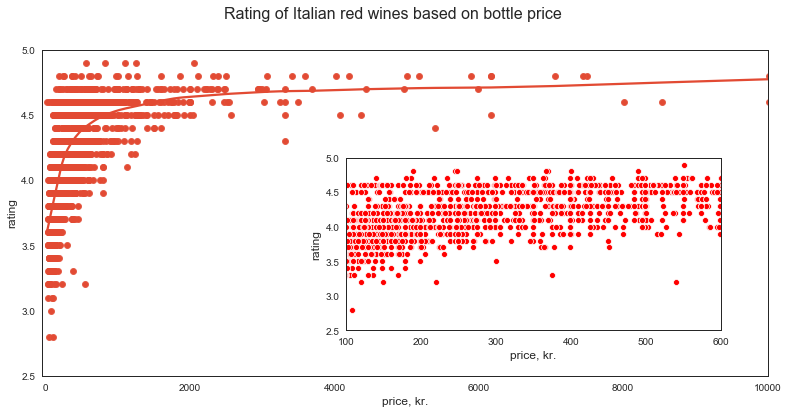

In [266]:
# Create placeholder for our plot:
fig,ax = plt.subplots(1, figsize=(13,6))
ax.set_xlim([-50,10000]), ax.set_ylim([2.5,5])
# Create scatterplot:
fig.suptitle('Rating of Italian red wines based on bottle price', fontsize=16)
price_distribution = sns.scatterplot(x='price, kr.', y='rating',  data=data)
# Add logistic regression to the plot:
sns.regplot(x='price, kr.', y='rating', data=data, lowess=True, ax=ax)

# Create placeholder for zoomed plot:
ax1 = fig.add_axes([0.45, 0.23, 0.4, 0.4])
ax1.set_xlim([100, 600]),ax1.set_ylim([2.5,5])

sns.scatterplot(x='price, kr.', y='rating', data=data, ax=ax1, color='red')


**Insight:** the scatterplot indicates that the rating of Italian red wines increases as the price gets higher. Notably however, we see that this assumption is not always true as it can be observed that some expensive bottles have a lower rating than bottles that are less expensive. Based on this, price seem to be a relevant variable to consider when predicting ratings.

### 2.2 Distribution of rating based on: year of bottle (Scatterplot)

[Text(0.5,1,'Distribution of rating [1980-2019]')]

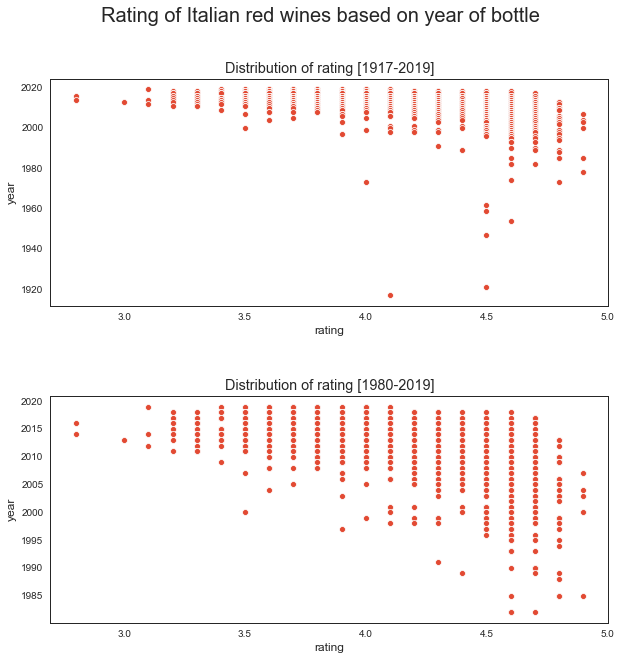

In [252]:
# Create placeholder for our plots:
fig,ax = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=.4)    

# Create first scatterplot with all years from our dataset:
fig.suptitle('Rating of Italian red wines based on year of bottle', fontsize=20)
price_distribution = sns.scatterplot(x='rating', y='year',  data=df, ax=ax[0])
price_distribution.set(title='Distribution of rating [1917-2019]')

# We want narrow the distribution and exclude the outlier observations 
# (wines that are older than 1980). To do this we create a subset of our
# dataset and exclude all observations where the year column has a value
# lower than 1980:
test = df.query("year >= 1980").copy()
test = test.reset_index(drop=True)

# Create plot of the subset data:
price_distribution2 = sns.scatterplot(x='rating', y='year',  data=test, ax=ax[1])
price_distribution2.set(title='Distribution of rating [1980-2019]')


**Insight:** The two graphs indicate that there's a correlation between rating and age of Italien red wine. We observe that most oftenly the rating of a wine is higher for aged wines. Interestingly, aged wines (+25 years) almost always receive ratings above 4. Based on this insight, age of Italian red wines seem to be a relevant variable to consider when predicting ratings. 

### 2.3 Distribution of rating based on: regions and cardinal directions (Boxplots)

[Text(0,0.5,'Rating'), Text(0.5,0,'Cardinal direction')]

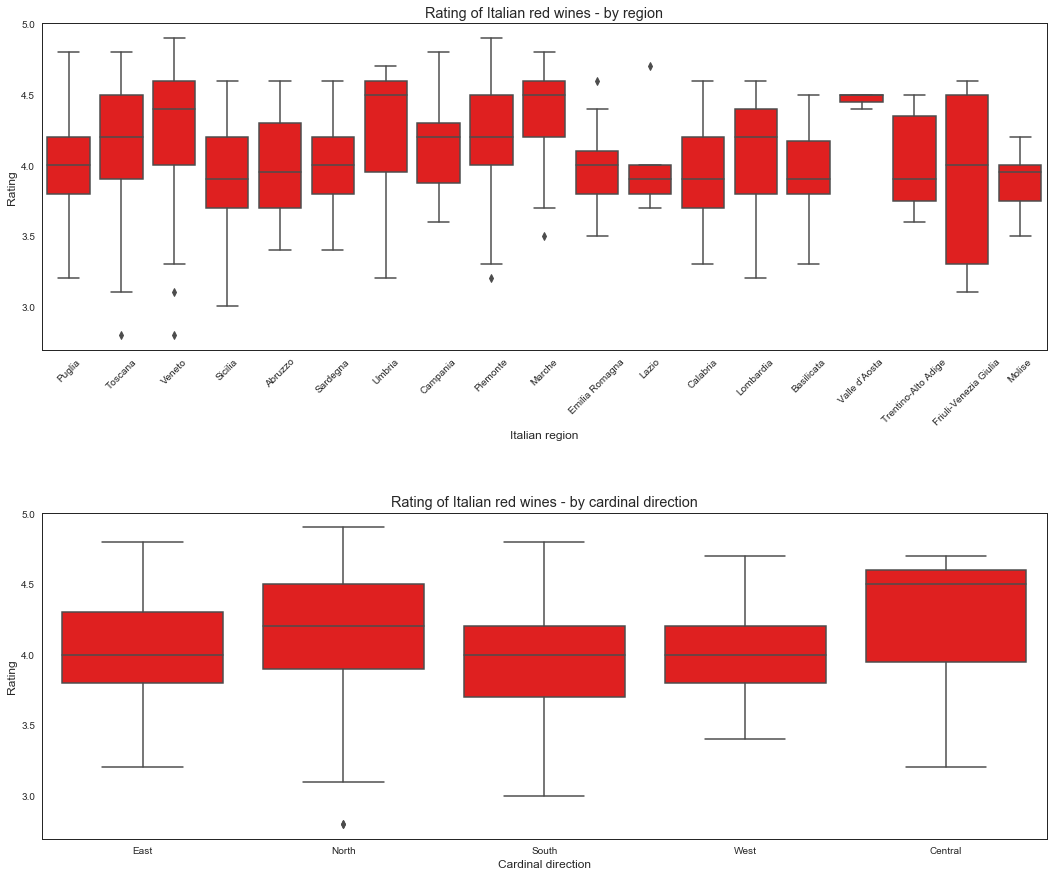

In [258]:
# Creating figures and axis:
sns.set_style(style='white')
fig, ax = plt.subplots(2, 1, figsize=(18,15))
fig.subplots_adjust(hspace=.5)


# Creating boxplots for regions and cardinal directions:
region_plot = sns.boxplot(data=df, 
                          x='region', 
                          y='rating',
                          color='red',
                          ax=ax[0],
                         )
region_plot.set_xticklabels(region_plot.get_xticklabels(), rotation=45)

cardinal_plot = sns.boxplot(data=df,
                            x='kompas', 
                            y='rating',
                            color='red',
                            ax=ax[1])

# Set titles and labels for both plots:
ax[0].set_title('Rating of Italian red wines - by region')
ax[0].set(xlabel='Italian region', ylabel='Rating')
ax[1].set_title('Rating of Italian red wines - by cardinal direction')
ax[1].set(xlabel='Cardinal direction', ylabel='Rating')



**Insights:** From the two boxplot we observe that distribution of ratings varies accross the different Italian regions. We narrow our scope of analysis to 5 regions (Lazio, Veneto, Umbria, Piemonte and Marche) in the interest of simplifying our research. 

In [298]:
# From the boxplots presented above we hand-pick 5 regions (Lazio, Veneto, Umbria, Piemonte and Marche) 
# for further exploration.In order to do a simple descriptive analysis we extract the ratings for each 
# region and store this in a new variable called 'result':
lazio = df.loc[df['region'] == 'Lazio']['rating'].reset_index(drop=True)
veneto = df.loc[df['region'] == 'Veneto']['rating'].reset_index(drop=True)
umbria = df.loc[df['region'] == 'Umbria']['rating'].reset_index(drop=True)
piemonte = df.loc[df['region'] == 'Piemonte']['rating'].reset_index(drop=True)
marche = df.loc[df['region'] == 'Marche']['rating'].reset_index(drop=True)

# We use the concat function from the Pandas library to easily store the data for each region in one variable:
result=pd.concat([lazio,veneto, umbria, piemonte, marche], axis=1, keys=['lazio', 'veneto', 'umbria', 'piemonte', 'marche'])

# We use the describe() function to present descriptive statistics about each region:
result.describe()

,lazio,veneto,umbria,piemonte,marche
count,9.000000,332.000000,31.000000,475.000000,13.000000
mean,3.966667,4.291265,4.219355,4.211789,4.338462
std,0.291548,0.389378,0.414262,0.336130,0.429221
min,3.700000,2.800000,3.200000,3.200000,3.500000
25%,3.800000,4.000000,3.950000,4.000000,4.200000
50%,3.900000,4.400000,4.500000,4.200000,4.500000
75%,4.000000,4.600000,4.600000,4.500000,4.600000
max,4.700000,4.900000,4.700000,4.900000,4.800000


**Insights:** What we already saw in the first boxplot, red wines from the region Lazio seems to receive the lowest average ratings (3,9967), while red wine from the region Marche receives the highest average ratings (4,3384). Similary, red wines from Marche generally receive higher ratings considering a 1st quartile of 4,20 meaning that 75% of the wines have received a rating above this rating. The same story goes for the veneto and piemonte regions, where 75% of the wines have received a rating higher than 4,0. Despite wines from the region lazio on average are rated lower than the four others, its standard deviation is in fact the lowest of all five regions, while its mimimum and maximum ratings are 3,7 and 4,7 respectively. This story indicates that red wines from Lazio are often similar in rating and above average.

Notably it can be observed from the data that the range in ratings of red wines from the regions Veneto, Umbria and Piemonte is quite wide (e.g. for Venento MIN-VAL = 2.8 while MAX-VAL = 4.9). This would indicate that a high rating of red Italian wine not neccessarily can be explained from its regional origin but is determined by other factors as well.  

### Is red wine from Piemonte really better?

While several studies have argued that consumer behavior is increasingly driven by social influencers [kilde], it can be argued that Vivino facilitate consumers a platform that leverage on this trend. Humans tend to adapt to other people's behaviour and listen to their advice and suggestions [kilde]. This could leave you with the thought that if a wine has been positively mentioned by social influencers, then consumers would tend to produce a similar positive perception about the specific wine. In the lines of this idea we thought it would be interesting to test if one of the renowned Italian regions, Piemonte in fact do receive higher ratings than the remaining Italian regions? Based on the scraped dataset from Vivino we calculate the average rating of red wines from Piemonte and the same for the remaining 17 regions:

In [306]:
# We calculated the mean rating for Piemonte in the previous code section:
print("Average rating for Piemonte: ", round(piemonte.mean(), 2))
# We calculate the mean rating for the remaining regions
not_piemonte = df[df.region != 'Piemonte']['rating']
print("Average rating for all Italian regions except Piemonte: ", round(not_piemonte.mean(), 2))


Average rating for Piemonte:  4.21
Average rating for all Italian regions except Piemonte:  4.14


We observe that red wines from the Italian region Piemonte is in fact higher rated on Vivino than the remaining 17 Italian regions in our dataset.  

### 2.4 Distribution of wine characteristics based on: regions (Barplots)

In [ ]:
#Unpivot the columns so wine characteristics are vertically stacked:
#long = pd.melt(subset,id_vars=['region'], var_name='characteristics', value_name='value')
#long

In [307]:
# We want to investigate how wine characteristics differ based on Italian regions. 
# First we create a subset of our initial dataframe with regions and characteristics:
subset = df[['region', 'light-bold', 'smooth-tannic', 'dry-sweet', 'soft-acidic']].copy()
display(subset)

,region,light-bold,smooth-tannic,dry-sweet,soft-acidic
0,Puglia,0.650714,0.180267,0.450025,0.081305
9,Toscana,0.357998,0.388327,0.021113,0.481139
1,Toscana,0.398265,0.359694,0.007172,0.423663
15,Puglia,0.615727,0.155450,0.478777,0.079876
14,Puglia,0.640909,0.217421,0.335016,0.124232
...,...,...,...,...,...
1993,Puglia,0.650000,0.156921,0.511158,0.057299
1994,Puglia,0.825000,0.348248,0.315641,0.144872
1995,Puglia,0.653592,0.278403,0.497206,0.111184
1996,Puglia,0.656680,0.186574,0.425296,0.071696


[Text(0,0,'Puglia'),
 Text(0,0,'Toscana'),
 Text(0,0,'Veneto'),
 Text(0,0,'Sicilia'),
 Text(0,0,'Abruzzo'),
 Text(0,0,'Sardegna'),
 Text(0,0,'Umbria'),
 Text(0,0,'Campania'),
 Text(0,0,'Piemonte'),
 Text(0,0,'Marche'),
 Text(0,0,'Emilia Romagna'),
 Text(0,0,'Lazio'),
 Text(0,0,'Calabria'),
 Text(0,0,'Lombardia'),
 Text(0,0,'Basilicata'),
 Text(0,0,'Valle d’Aosta'),
 Text(0,0,'Trentino-Alto Adige'),
 Text(0,0,'Friuli-Venezia Giulia'),
 Text(0,0,'Molise')]

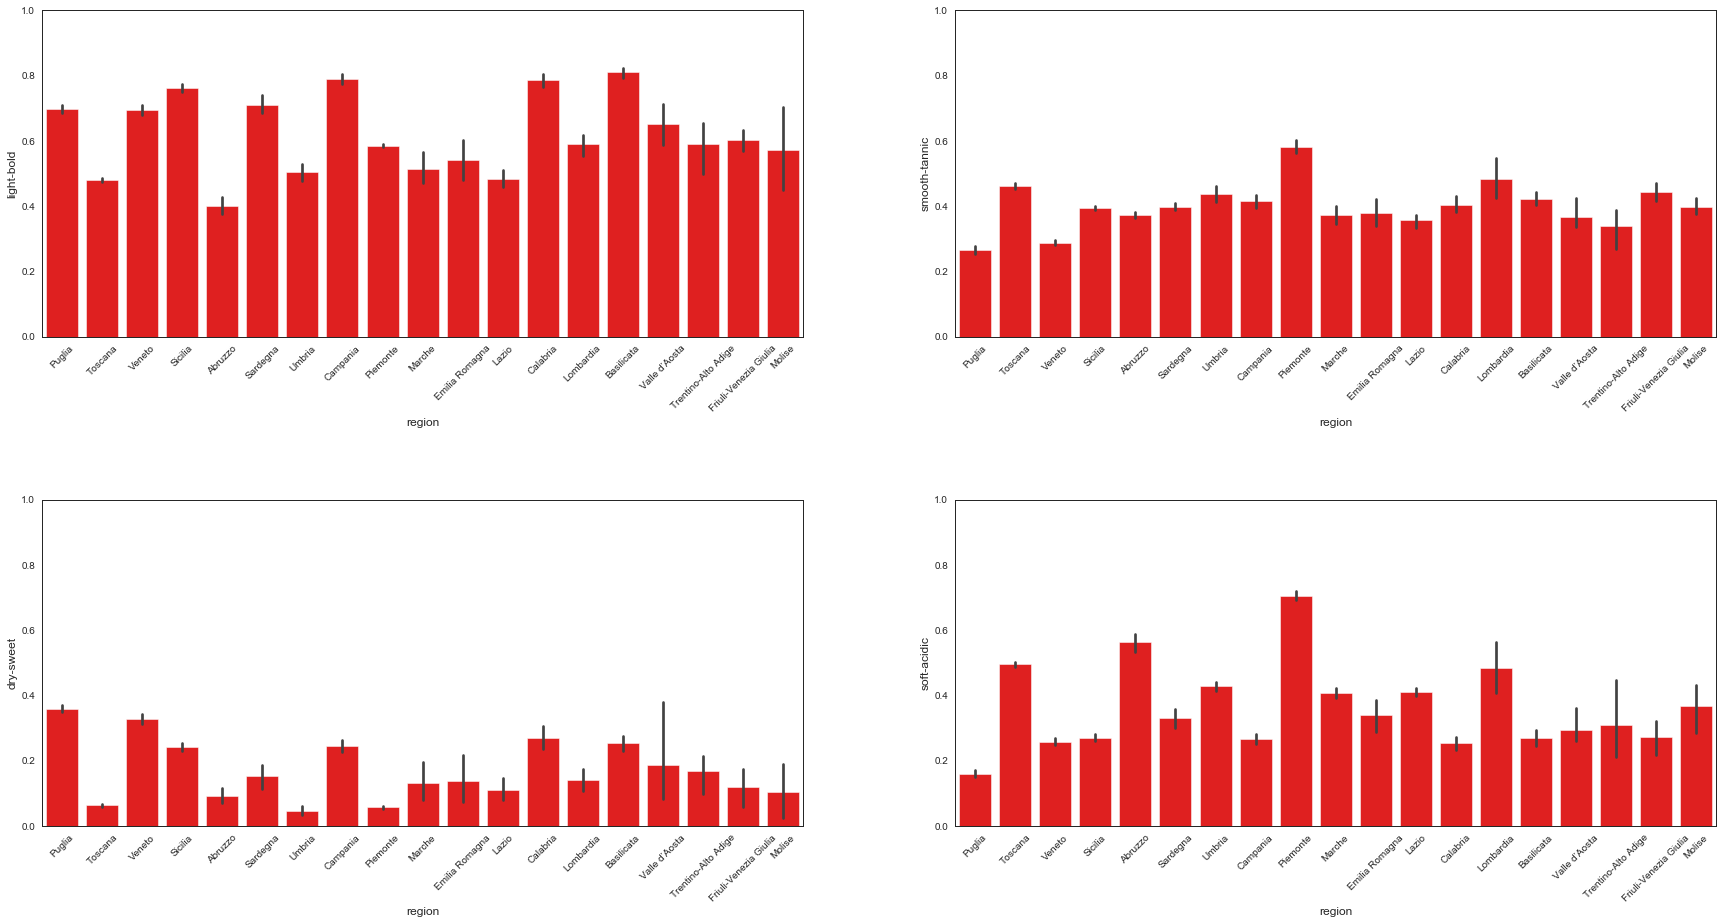

In [308]:
# Next we plot the data in bar plots for each wine charactheristic:
# Create figure and axis and ensure proper spacing and axis setting:
sns.set_style(style='white')
fig, ax = plt.subplots(2, 2, figsize=(30,15))
fig.subplots_adjust(hspace=.5)    
ax[0][0].set_ylim([0,1])
ax[0][1].set_ylim([0,1])
ax[1][0].set_ylim([0,1])
ax[1][1].set_ylim([0,1])

# Create a barplot for each characteristic:
lightbold = sns.barplot(x='region', y='light-bold', color='red', data=subset, ax=ax[0][0]) 
lightbold.set_xticklabels(lightbold.get_xticklabels(), rotation=45)

smootthtannic = sns.barplot(x='region', y='smooth-tannic', color='red', data=subset, ax=ax[0][1]) 
smootthtannic.set_xticklabels(smootthtannic.get_xticklabels(), rotation=45)

drysweet = sns.barplot(x='region', y='dry-sweet', color='red', data=subset, ax=ax[1][0]) 
drysweet.set_xticklabels(drysweet.get_xticklabels(), rotation=45)

softacidic = sns.barplot(x='region', y='soft-acidic', color='red', data=subset, ax=ax[1][1]) 
softacidic.set_xticklabels(softacidic.get_xticklabels(), rotation=45)


First of all it can be observed that the wine characteristics differ accros Italian wine regions. 

We see that red wines from the region Abruzzo are on average more light than bold, more dry than sweet and more acidic than soft.

Looking at the same previous five regions as before, the following observations can be made:

1. **Lazio:** 
    * Light - bold: average characteristic is more light than bold.
    * Smooth - tannic: average characteristic is more smooth than tannic.
    * Dry - sweet: average characteristic is mostly dry than sweet.
    * Soft - accidic: average characteristic is slightly more soft than accidic.
2. **Veneto:**
    * Light - bold: average characteristic is slightly more bold than light.
    * Smooth - tannic: average characteristic is more smooth than tannic.
    * Dry - sweet: average characteristic is more dry than sweet.
    * Soft - accidic: average characteristic is more soft than accidic.
3. **Umbria:**
    * Light - bold: average characteristic is neither more bold nor light.
    * Smooth - tannic: average characteristic is slightly more smooth than tannic.
    * Dry - sweet: average characteristic is mostly dry than sweet.
    * Soft - accidic: average characteristic is neither more soft nor accidic.    
4. **Piemonte:**
    * Light - bold: average characteristic is neither more bold nor light.
    * Smooth - tannic: average characteristic is neither more smooth nor tannic.
    * Dry - sweet: average characteristic is mostly dry than sweet.
    * Soft - accidic: average characteristic is more accidic than soft.
5. **Marche:**
    * Light - bold: average characteristic is neither more bold nor light.
    * Smooth - tannic: average characteristic is slightly more smooth than tannic.
    * Dry - sweet: average characteristic is mostly dry than sweet.
    * Soft - accidic: average characteristic is more soft than accidic.